In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
#Getting census data

census_df = pd.read_csv("NewyorkBorough.csv", )
census_df.head()

,Fact,Brooklyn,Staten Island,Queens,Bronx,Manhattan
0,"Population estimates, July 1, 2019, (V2019)","2,559,903","476,143","2,253,858","1,418,207","1,628,706"
1,"Population estimates base, April 1, 2010, (V2...","2,504,721","468,730","2,230,619","1,384,580","1,586,381"
2,"Population, percent change - April 1, 2010 (es...",2.2%,1.6%,1.0%,2.4%,2.7%
3,"Population, Census, April 1, 2010","2,504,700","468,730","2,230,722","1,385,108","1,585,873"
4,"Persons under 5 years, percent",7.2%,5.8%,6.2%,7.2%,4.7%


In [14]:
census_df = census_df.iloc[[0,7,32,44,47,48,49,52,54]].reset_index()
census_df = census_df.T
census_df.columns=["Population","FemalePercent","BachelorsDegreePercent","MedianIncome","TotalEmployer","TotalEmployment","AnnualPayroll","AllFirms","WomenOwnedFirms"
        ]
census_df = census_df.iloc[2:]
census_df = census_df.reset_index()
census_df.rename(columns={'index':'Borough'}, inplace=True)
census_df


,Borough,Population,FemalePercent,BachelorsDegreePercent,MedianIncome,TotalEmployer,TotalEmployment,AnnualPayroll,AllFirms,WomenOwnedFirms
0,Brooklyn,"2,559,903",52.6%,36.5%,"$56,015","58,785","626,732","25,733,275","296,858","118,489"
1,Staten Island,"476,143",51.5%,33.0%,"$79,267","9,387","105,632","4,419,572","39,645","13,921"
2,Queens,"2,253,858",51.5%,31.5%,"$64,987","50,262","565,709","28,241,545","265,643","97,982"
3,Bronx,"1,418,207",52.9%,19.8%,"$38,085","18,199","266,075","12,126,908","135,782","68,705"
4,Manhattan,"1,628,706",52.7%,60.8%,"$82,459","103,925","2,260,419","253,262,886","315,399","114,896"


In [16]:


cols_to_apply = census_df.columns
chars_to_remove = ["%","$",","]
for col in cols_to_apply:
    for char in chars_to_remove:
        census_df[col]=census_df[col].str.replace(char,"")

census_df



/var/folders/p5/5cz9q1c15pn6hbl2m1csrmjh0000gn/T/ipykernel_78681/4067080042.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  census_df[col]=census_df[col].str.replace(char,"")


,Borough,Population,FemalePercent,BachelorsDegreePercent,MedianIncome,TotalEmployer,TotalEmployment,AnnualPayroll,AllFirms,WomenOwnedFirms
0,Brooklyn,2559903,52.6,36.5,56015,58785,626732,25733275,296858,118489
1,Staten Island,476143,51.5,33.0,79267,9387,105632,4419572,39645,13921
2,Queens,2253858,51.5,31.5,64987,50262,565709,28241545,265643,97982
3,Bronx,1418207,52.9,19.8,38085,18199,266075,12126908,135782,68705
4,Manhattan,1628706,52.7,60.8,82459,103925,2260419,253262886,315399,114896


In [17]:


#Converting Dtype to numeric (int, float)
census_df["Population"] = census_df["Population"].astype('int64')
census_df["FemalePercent"] = census_df["FemalePercent"].astype('float')
census_df["BachelorsDegreePercent"] = census_df["BachelorsDegreePercent"].astype('float')
census_df["MedianIncome"] = census_df["MedianIncome"].astype('int64')
census_df["TotalEmployer"] = census_df["TotalEmployer"].astype('int64')
census_df["TotalEmployment"] = census_df["TotalEmployment"].astype('int64')
census_df["AnnualPayroll"] = census_df["AnnualPayroll"].astype('int64')
census_df["AllFirms"] = census_df["AllFirms"].astype('int64')
census_df["WomenOwnedFirms"] = census_df["WomenOwnedFirms"].astype('int64')

census_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Borough                 5 non-null      object 
 1   Population              5 non-null      int64  
 2   FemalePercent           5 non-null      float64
 3   BachelorsDegreePercent  5 non-null      float64
 4   MedianIncome            5 non-null      int64  
 5   TotalEmployer           5 non-null      int64  
 6   TotalEmployment         5 non-null      int64  
 7   AnnualPayroll           5 non-null      int64  
 8   AllFirms                5 non-null      int64  
 9   WomenOwnedFirms         5 non-null      int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 528.0+ bytes


In [19]:


# Saving csv file for brief cencus data
census_df.to_csv("NewYorkBoroughBrief.csv")



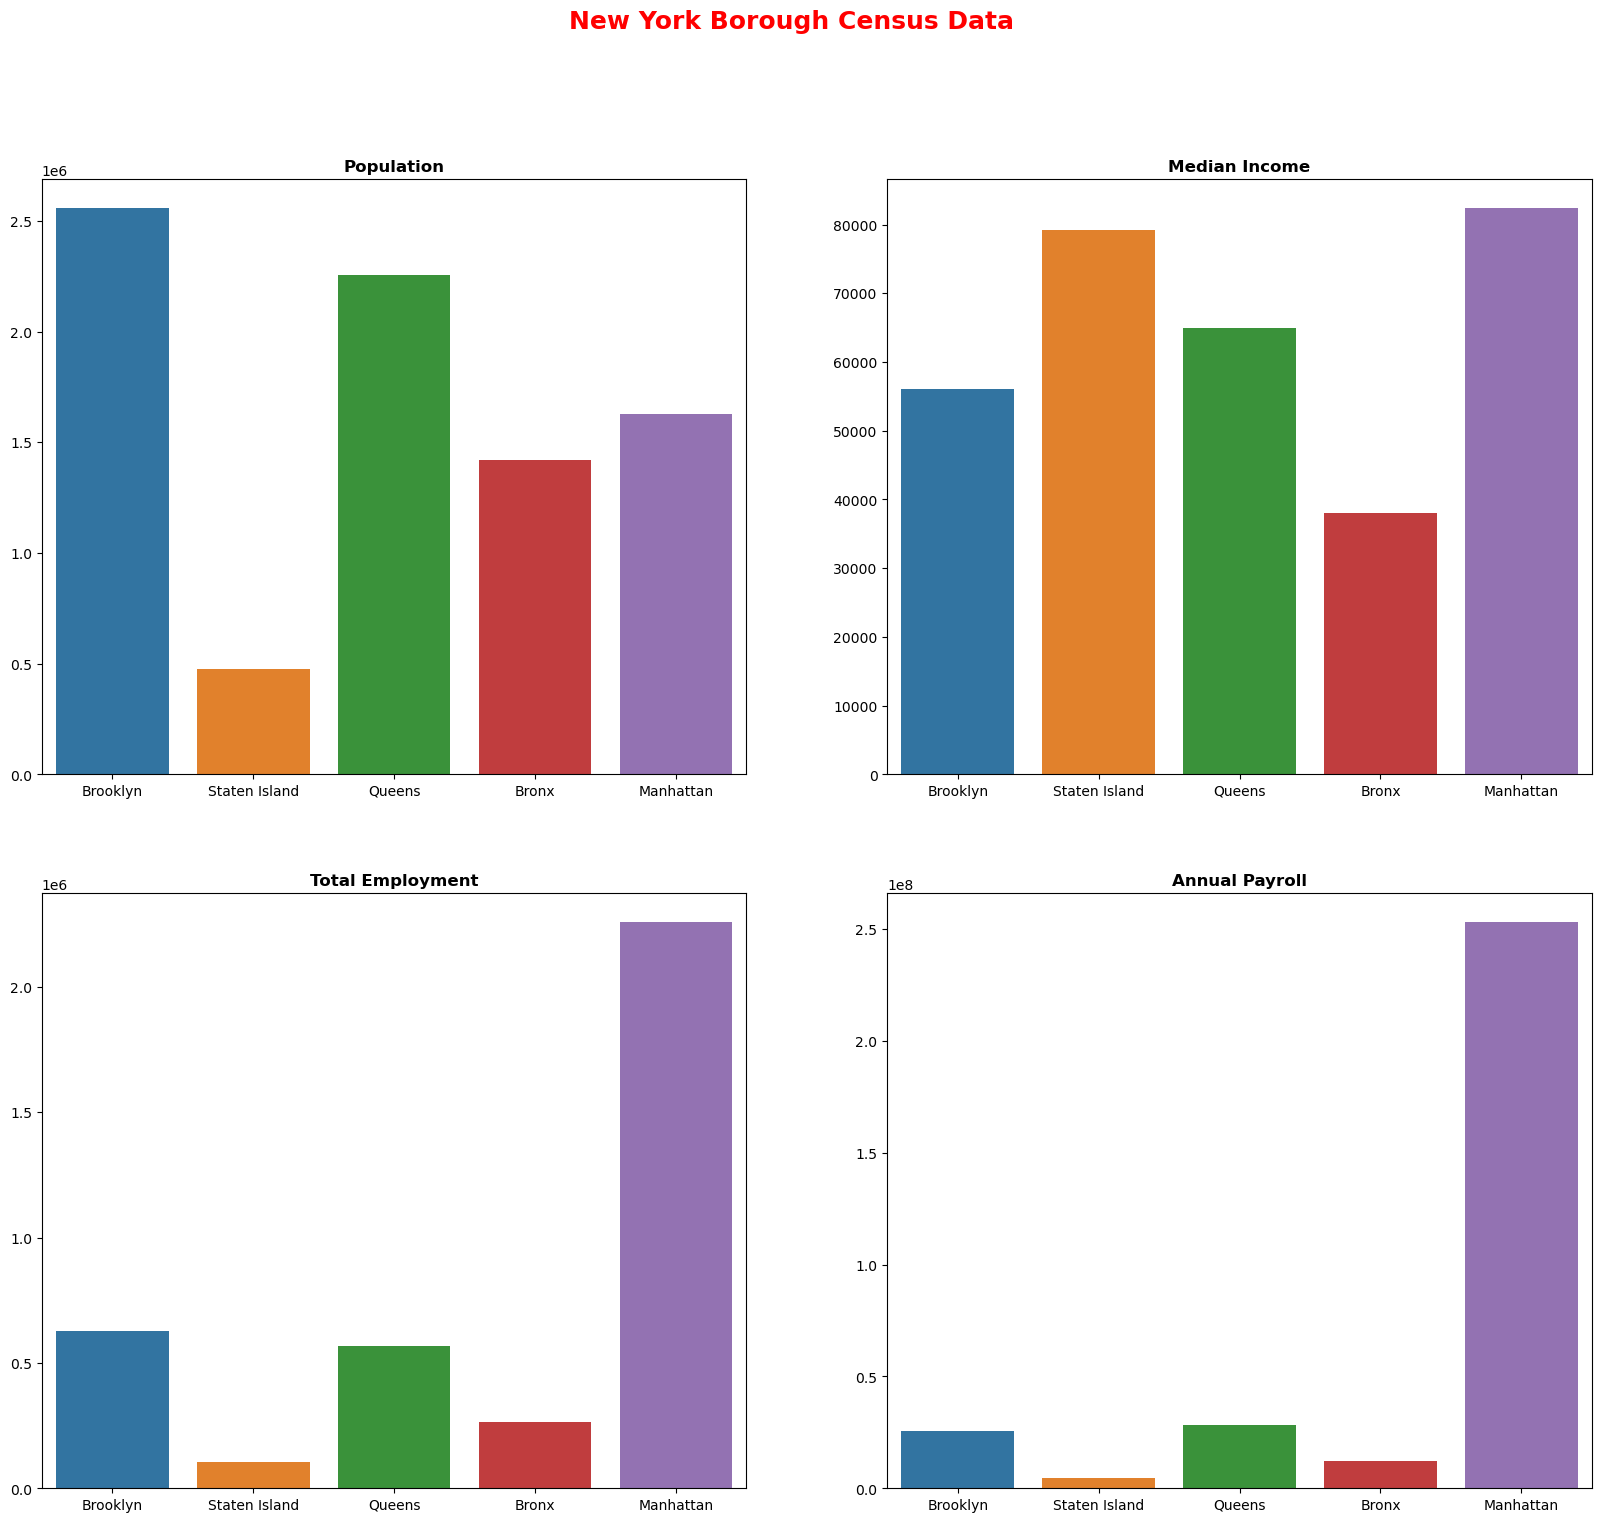

In [24]:


plt.figure(figsize=[20,17])
plt.style.use('default')


plt.suptitle('New York Borough Census Data',fontsize = 18, weight="bold",c="red")

plt.subplot(2,2,1) # (number of rows, number of columns, number of plot)
ax = sns.barplot(x="Borough", y="Population", data=census_df)
plt.xlabel(""),plt.ylabel("")
plt.title('Population', weight="bold");

# plt.subplot(3,3,2) # (number of rows, number of columns, number of plot)
# ax = sns.barplot(x="Borough", y="FemalePercent", data=census_df)
# plt.xlabel(""),plt.ylabel("")
# plt.title('Female Percent', weight="bold");


# plt.subplot(3,3,3) # (number of rows, number of columns, number of plot)
# ax = sns.barplot(x="Borough", y="BachelorsDegreePercent", data=census_df)
# plt.xlabel(""),plt.ylabel("")
# plt.title('Bachelors Degree Percent', weight="bold");

plt.subplot(2,2,2) # (number of rows, number of columns, number of plot)
ax = sns.barplot(x="Borough", y="MedianIncome", data=census_df)
plt.xlabel(""),plt.ylabel("")
plt.title('Median Income', weight="bold");

# plt.subplot(3,3,5) # (number of rows, number of columns, number of plot)
# ax = sns.barplot(x="Borough", y="TotalEmployer", data=census_df)
# plt.xlabel(""),plt.ylabel("")
# plt.title('Total Employer', weight="bold");

plt.subplot(2,2,3) # (number of rows, number of columns, number of plot)
ax = sns.barplot(x="Borough", y="TotalEmployment", data=census_df)
plt.xlabel(""),plt.ylabel("")
plt.title('Total Employment', weight="bold");

plt.subplot(2,2,4) # (number of rows, number of columns, number of plot)
ax = sns.barplot(x="Borough", y="AnnualPayroll", data=census_df)
plt.xlabel(""),plt.ylabel("")
plt.title('Annual Payroll', weight="bold");

# plt.subplot(3,3,8) # (number of rows, number of columns, number of plot)
# ax = sns.barplot(x="Borough", y="AllFirms", data=census_df)
# plt.xlabel(""),plt.ylabel("")
# plt.title('All Firms', weight="bold");

# plt.subplot(3,3,9) # (number of rows, number of columns, number of plot)
# ax = sns.barplot(x="Borough", y="WomenOwnedFirms", data=census_df)
# plt.xlabel(""),plt.ylabel("")
# plt.title('Women Owned Firms', weight="bold");



